# Работа с Pandas

Булыгин Олег  

* [LinkedIn](linkedin.com/in/obulygin)  
* [Telegram](https://t.me/obulygin91)  
* [facebook](fb.com/obulygin91)  
* [Vk](vk.com/obulygin91)  
* email: obulygin91@ya.ru  

[Сообщество по Python](https://yandex.ru/q/loves/pythontalk/) на Кью  
[Сообщество по Data Science и анализу данных](https://yandex.ru/q/loves/datatalk/) на Кью 

## План
В рамках воркфлоу работы с открытым датафреймом по реальным транзакциям британского онлайн-магазина подарков. Реализуем набор аналитических действий и решим задачи:
- посчитаем статистику по странам;
- проанализируем выручку;
- изучим статистику по клиентам;
- проанализируем динамику среднего чека;
- просегментируем товары по стоимости;
- сделаем когортный анализ и анализ удержания клиентов (уже непросто!).

Пройдя по этим шагам повторим:
- базовую работу с датами;
- преобразование типов;
- сортировку;
- группировку и сводные таблицы;
- объединение датафреймов.

In [1]:
# импортируем pandas
import pandas as pd

### Открытие и знакомство с данными

In [2]:
# читаем данные из csv, который находится в zip-файле на github
url = 'https://github.com/obulygin/SkillFactory/blob/main/ecommerce-data.zip?raw=true'
df = pd.read_csv(url, encoding='ISO-8859-1', compression='zip')

In [3]:
# смотрим первые 5 строк таблицы
display(df.head())
# смотрим последние 5 строк таблицы
display(df.tail())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [4]:
# рассчитываем базовые статистики по каждому числовому признаку
df.describe() 

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Избавимся от отрицательных значений

In [5]:
# оставляем данные только с положительными ценами на товар и количеством
df = df[(df['UnitPrice'] > 0) & (df['Quantity'] > 0)]
df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


### Избавимся от дубликатов в данных

In [6]:
# посмотрим, сколько у нас повторов
print(df.duplicated().sum())

5226


In [7]:
# сколько всего строк?
print(df.shape)

(530104, 8)


In [8]:
# удалим дубли и проверим
df.drop_duplicates(inplace=True)
print(df.shape)

(524878, 8)


### Поправим типы данных

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524878 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    524878 non-null  object 
 1   StockCode    524878 non-null  object 
 2   Description  524878 non-null  object 
 3   Quantity     524878 non-null  int64  
 4   InvoiceDate  524878 non-null  object 
 5   UnitPrice    524878 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      524878 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.0+ MB


In [10]:
# почему ошибка?
df['CustomerID'] = df['CustomerID'].astype('int64')

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [11]:
# Nullable datatypes: https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html
df['CustomerID'] = df['CustomerID'].astype('Int64')

In [12]:
# переведем даты из строкового формата в datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524878 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   392692 non-null  Int64         
 7   Country      524878 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 36.5+ MB


### Изучаем статистику по странам

In [14]:
# считаем сколько транзакций было по странам при помощи value_counts
df['Country'].value_counts()

United Kingdom          479985
Germany                   9025
France                    8392
EIRE                      7879
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1958
Portugal                  1492
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon 

In [15]:
# считаем сколько уникальных пользователей в странах
countries = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
countries

Country
United Kingdom          3920
Germany                   94
France                    87
Spain                     30
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     14
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Channel Islands            9
Denmark                    9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
USA                        4
Canada                     4
Unspecified                4
Greece                     4
EIRE                       3
Israel                     3
Malta                      2
United Arab Emirates       2
Bahrain                    2
Lithuania                  1
Czech Republic             1
Lebanon                    1
RSA                        1
Saudi Arabia               1
Singapore                  1
Icelan

#### Практика. Определяем топ-5 лояльных клиентов по количеству покупок

In [22]:
clients = df.groupby('CustomerID')['Quantity'].nunique().sort_values(ascending=False)
display(clients)

CustomerID
17450    102
18102     74
14646     60
13694     59
12748     58
        ... 
13242      1
13228      1
13185      1
17443      1
12346      1
Name: Quantity, Length: 4338, dtype: int64

### Создадим временные признакми

In [17]:
# добавим месяц покупки в новый столбец при помощи dt.strftime('%Y - %m')
df['InvoiceMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m') 

In [18]:
# уникальные покупатели по месяцам
df.groupby('InvoiceMonth')['CustomerID'].nunique()

InvoiceMonth
2010-12     885
2011-01     741
2011-02     758
2011-03     974
2011-04     856
2011-05    1056
2011-06     991
2011-07     949
2011-08     935
2011-09    1266
2011-10    1364
2011-11    1664
2011-12     615
Name: CustomerID, dtype: int64

In [19]:
# зафиксируем дни недели
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek + 1

In [20]:
# посчитаем количество заказов по дням недели
df.groupby('DayOfWeek')['InvoiceNo'].nunique()


DayOfWeek
1    3126
2    3554
3    3690
4    4246
5    3140
7    2204
Name: InvoiceNo, dtype: int64

#### Практика. Изучим динамику количества покупок по часам

In [24]:
df['InvoiceHour'] = df['InvoiceDate'].dt.hour
df.groupby('InvoiceHour')['InvoiceNo'].nunique()


InvoiceHour
6        1
7       29
8      566
9     1484
10    2361
11    2396
12    3220
13    2753
14    2457
15    2336
16    1335
17     667
18     192
19     146
20      18
Name: InvoiceNo, dtype: int64

### Посчитаем выручку

In [25]:
# создадим новый столбец
df['Revenue'] = df['Quantity'] * df['UnitPrice']

df.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceHour,InvoiceMonth,DayOfWeek,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,8,2010-12,3,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,2010-12,3,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,8,2010-12,3,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,2010-12,3,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,2010-12,3,20.34


<AxesSubplot:xlabel='InvoiceMonth'>

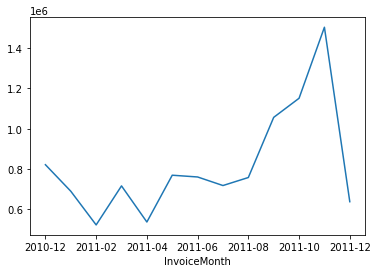

In [27]:
# выручка по месяцам
df.groupby('InvoiceMonth')['Revenue'].sum().plot()

#### Практика. Найдите 3 страны, которые принесли максимальную выручку после UK

In [33]:
# так можно подавить scientific notation
pd.set_option('display.float_format', None)
df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(4)

Country
United Kingdom    9.001744e+06
Netherlands       2.854463e+05
EIRE              2.831405e+05
Germany           2.286784e+05
Name: Revenue, dtype: float64

### Сегменты товаров по стоимости

In [29]:
# напишем функцию для сегментации товаров
def price_segment(row):
    if row < 5:
        return 'cheap' 
    if 5 <= row < 25:
        return 'lower-middle'
    if 25 <= row < 100:
        return 'upper-middle'
    if row >= 100:
        return 'expensive'
 

df['PriceSegment'] = df['UnitPrice'].apply(price_segment)
df['PriceSegment'].value_counts()

cheap           439707
lower-middle     82916
upper-middle      1443
expensive          812
Name: PriceSegment, dtype: int64

#### Практика. Определить, какая из категорий товаров принесла больше всего выручки

In [30]:
df.groupby('PriceSegment')['Revenue'].sum().sort_values(ascending=False)

PriceSegment
cheap          7887707.80
lower-middle   2280824.46
expensive       374342.75
upper-middle     99235.79
Name: Revenue, dtype: float64

### Как меняется средний чек со временем?

In [31]:
# divide - деление выручки на чеки
df.groupby('InvoiceMonth')['Revenue'].sum().divide(df.groupby('InvoiceMonth')['InvoiceNo'].nunique())

InvoiceMonth
2010-12   526.91
2011-01   635.19
2011-02   475.04
2011-03   492.58
2011-04   430.95
2011-05   457.64
2011-06   496.12
2011-07   486.83
2011-08   556.83
2011-09   575.09
2011-10   564.34
2011-11   543.11
2011-12   778.74
dtype: float64

### Построим сводные таблицы

In [37]:
# сводная таблица по выручки в определенной стране в разрезе пользователей и месяцев
country = 'France'
table = pd.pivot_table(
    df[df['Country']==country], 
    index='CustomerID', 
    columns='InvoiceMonth', 
    aggfunc=sum, 
    values='Revenue', 
    fill_value=0)

table.round(1)
# подсветить максимальные значения по каждому месяцу
#table.style.highlight_max()
#или
# table.style.background_gradient(cmap='PuBu')

InvoiceMonth,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CustomerID,,,,,,,,,,,,,
12413,0.0,479.3,0.0,0.0,84.6,0.0,0.0,0.0,0.0,0.0,194.2,0.0,0.0
12437,0.0,392.7,590.3,147.7,209.1,635.3,501.6,0.0,0.0,557.3,263.5,1488.0,165.9
12441,173.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,553.4,214.1,531.2,0.0
12489,0.0,334.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12734,110.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12735,0.0,779.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12736,0.0,234.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Практика. Построить сводную таблицу c кол-вом заказов по странам и месяцам


In [42]:
table_2 = pd.pivot_table(
    df, 
    index='Country', 
    columns='InvoiceMonth', 
    aggfunc='nunique', 
    values='InvoiceNo', 
    fill_value=0)

table_2.style.background_gradient(cmap='PuBu')


InvoiceMonth,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
Country,,,,,,,,,,,,,
Australia,3,9,5,3,2,4,4,7,2,8,4,6,0
Austria,1,0,2,2,2,2,0,2,2,0,1,2,1
Bahrain,1,0,0,0,0,2,0,0,0,0,0,0,0
Belgium,5,3,8,9,6,9,11,5,9,7,11,11,4
Brazil,0,0,0,0,1,0,0,0,0,0,0,0,0
Canada,0,0,0,1,0,1,1,2,1,0,0,0,0
Channel Islands,1,1,1,3,1,2,1,0,5,2,5,3,1
Cyprus,1,1,6,1,0,0,1,0,0,1,4,1,0
Czech Republic,0,0,1,0,0,0,0,0,0,0,1,0,0


In [43]:
# изучим сводную статистику по покупателям из произвольной страны (суммарная и средняя выручка)
products = df[df['Country']==country].groupby(['CustomerID', 'InvoiceNo'], as_index=False)['Revenue'].sum()
display(products)
products = products.groupby('CustomerID').agg({'InvoiceNo': ['count'], 'Revenue': ['sum','mean']})
display(products)

,CustomerID,InvoiceNo,Revenue
0,12413,540365,479.25
1,12413,550338,84.65
2,12413,569402,194.20
3,12437,540972,392.70
4,12437,543030,150.50
...,...,...,...
384,12736,540688,234.00
385,12740,570030,427.60
386,14277,552826,1629.03
387,14277,577152,499.40


InvoiceNo  Revenue             
               count      sum         mean
CustomerID                                
12413              3   758.10   252.700000
12437             18  4951.41   275.078333
12441              1   173.55   173.550000
12488              3  1298.66   432.886667
12489              1   334.93   334.930000
...              ...      ...          ...
12734              1   110.40   110.400000
12735              2   779.57   389.785000
12736              1   234.00   234.000000
12740              1   427.60   427.600000
14277              3  4188.00  1396.000000

[87 rows x 3 columns]

In [ ]:
# объединяем статистику по месяцам и статистику по выручки и количеству заказов в разрезе пользователей
table_plus = pd.merge(table, products, on='CustomerID') 
table_plus.style.highlight_max()
# table_plus.style.background_gradient(cmap='PuBu')

### Когортный анализ

Идея когортного анализа состоит в том, чтобы резделить пользоватей на группы по определенным признакам, и отслеживать поведение этих групп во времени. Обычно группы пользователей (когорты) выделяют на основе недели (месяца), когда пользователи совершили первую покупку.

Выделив такие группы пользователей (когорты), вы следите за ними в течение времени и измеряете ключевые метрики для каждой отдельной когорты.

In [ ]:
# определяем месяц первой покупки для каждого покупателя 
cohorts = df.groupby('CustomerID', as_index=False)['InvoiceMonth'].min()
cohorts.rename(columns = {'InvoiceMonth':'Cohort'}, inplace=True)
cohorts.head()

In [ ]:
# добавим когорты к основным данным

# исключаем пропуски по пользователям для корректного объединения
df_merged = pd.merge(df.dropna(), cohorts, how='left', on='CustomerID')
df_merged.head()

In [ ]:
# считаем доходы по когортам
df_merged.groupby('Cohort')['Revenue'].sum()

### Анализ retention

Customer retention (удержание клиентов) — это способность компании удерживать своих потребителей в течение определенного периода времени.

In [ ]:
import numpy as np

# пишем функцию которая добавляет столбец с временем жизни каждой когорты
def cohort_period(df):
  df['CohortLT'] = np.arange(len(df))
  return df

# считаем сколько уникальных клиентов у нас в каждой когорте
cohorts = df_merged.groupby(['Cohort', 'InvoiceMonth'])[['CustomerID']].nunique()
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.rename({'CustomerID': 'TotalUsers'}, inplace=True)
cohorts

In [ ]:
# переведем когорты в индекс, а дату чека в столбец
cohorts.reset_index(inplace=True)
cohorts.set_index(['Cohort', 'CohortLT'], inplace=True) 
cohorts

In [ ]:
# считаем ретеншн пользователей в каждой когорте

# определим количество покупок в первый месяц когорты (100%)
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size


In [ ]:
# узнаем какой процент покупок этой когортой совершался в последующие месяца
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention

**Спасибо за внимание буду рад ответить на ваши вопросы!**  
Ссылка на форму ОС:
https://forms.gle/y8xaFwJqtbFSjUeG8